<a href="https://colab.research.google.com/github/kimseoa/test/blob/master/cat_%26_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [0]:
batch_size = 10
total_epoch = 30  
learning_rate = 0.005
use_cuda = torch.cuda.is_available()
criterion = nn.CrossEntropyLoss() 

print(use_cuda)

True


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
from PIL import Image
import os
import matplotlib.pyplot as plt


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cat_path = '/content/gdrive/My Drive/content/trainset/cats/'
jpg_list=[]
for i in range(1,101): 
  ab = 'cat.'+str(i)+'.jpg'
  jpg_list.append(ab)
print(jpg_list)

path_list=[] 
for i in jpg_list:
  bb = cat_path+i
  path_list.append(bb)
print(path_list)

dog_path = '/content/gdrive/My Drive/content/trainset/dogs/'
dog_jpg_list=[]
for i in range(1,101): 
  ab = 'dog.'+str(i)+'.jpg'
  dog_jpg_list.append(ab)
print(dog_jpg_list)

dog_path_list=[] 
for i in dog_jpg_list:
  bb = dog_path+i
  dog_path_list.append(bb)
print(dog_path_list)

test_cat_path = '/content/gdrive/My Drive/content/testset/cats/'
test_cat_list=[]
for i in range(1,10): 
  ab = 'cat.400'+str(i)+'.jpg'
  test_cat_list.append(ab)
print(test_cat_list)

test_cat=[] 
for i in test_cat_list:
  bb = test_cat_path+i
  test_cat.append(bb)
print(test_cat)


test_dog_path = '/content/gdrive/My Drive/content/testset/dogs/'
test_dog_list=[]
for i in range(1,10): 
  ab = 'dog.400'+str(i)+'.jpg'
  test_dog_list.append(ab)
print(test_dog_list)

test_dog=[] 
for i in test_dog_list:
  bb = test_dog_path+i
  test_dog.append(bb)
print(test_dog)



['cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg', 'cat.5.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.50.jpg', 'cat.51.jpg', 'cat.52.jpg', 'cat.53.jpg', 'cat.54.jpg', 'cat.55.jpg', 'cat.56.jpg', 'cat.57.jpg', 'cat.58.jpg', 'cat.59.jpg', 'cat.60.jpg', 'cat.61.jpg', 'cat.62.jpg', 'cat.63.jpg', 'cat.64.jpg', 'cat.65.jpg', 'cat.66.jpg', 'cat.67.jpg', 'cat.68.jpg', 'cat.69.jpg', 'cat.70.jpg', 'cat.71.jpg', 'cat.72.jpg', 

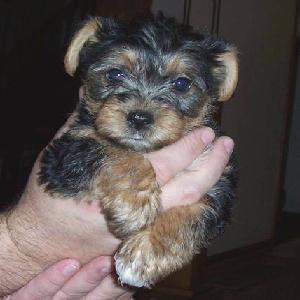

In [0]:
image = Image.open(test_dog[1])
resize_image = image.resize((300,300))
resize_image

In [0]:
from PIL import Image
import numpy as np

#train _resize 하기
cat_t_resize=[]
for i in range(100):
  image = Image.open(path_list[i])
  resize_image = np.array(image.resize((300,300)))
  cat_t_resize.append(resize_image)

dog_t_resize=[]
for i in range(100):
  image = Image.open(dog_path_list[i])
  resize_image = np.array(image.resize((300,300)))
  dog_t_resize.append(resize_image)
  
  
#test_resize 하기
cat_test_resize=[]
for i in range(9):
  image = Image.open(test_cat[i])
  resize_image = np.array(image.resize((300,300)))
  cat_test_resize.append(resize_image)

dog_test_resize=[]
for i in range(9):
  image = Image.open(test_dog[i])
  resize_image = np.array(image.resize((300,300)))
  dog_test_resize.append(resize_image)  

  
  

In [0]:
train_tensorlist=[]
for i in range(100):  
  ee=(torch.FloatTensor(cat_t_resize[i]).reshape([3,300,300]),0)
  ff=(torch.FloatTensor(dog_t_resize[i]).reshape([3,300,300]),1)
  train_tensorlist.append(ee)
  train_tensorlist.append(ff)

test_tensorlist=[]
for i in range(9):  
  ee=(torch.FloatTensor(cat_test_resize[i]).reshape([3,300,300]),0)
  ff=(torch.FloatTensor(dog_test_resize[i]).reshape([3,300,300]),1)
  test_tensorlist.append(ee)
  test_tensorlist.append(ff)
 

In [0]:
train_loader = torch. utils.data.DataLoader(dataset = train_tensorlist, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_tensorlist, batch_size=batch_size, shuffle=True)

In [0]:
def train(model, train_loader):
  model.train()
  
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  losses = []
  for i, (image, label) in enumerate(train_loader):
    
    if use_cuda:
      image = image.cuda()
      label = label.cuda()
      

    pred_label = model(image)
    loss = criterion(pred_label, label)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  avg_loss = sum(losses)/len(losses)
  return avg_loss

In [0]:
def eval(model, test_loader):
  model.eval()
  device = next(model.parameters()).device.index
  
  total_cnt = 0
  correct_cnt = 0
  
  for i,(image, label) in enumerate(test_loader):
    if use_cuda:
      image = image.cuda()
      label = label.cuda()
      
      
      out = model(image)
      _, pred_label = torch.max(out.data, 1)
      total_cnt += image.data.size()[0]
      correct_cnt +=(pred_label == label.data).sum().item()
      
  return correct_cnt/ total_cnt

In [0]:
# Resnet

class SimpleResNet(nn.Module):
  def __init__(self):
    super(SimpleResNet, self).__init__()
    self.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), padding=(1,1))
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    

    self.conv2 = nn.Conv2d(64,128, kernel_size=(3,3), padding=(1,1))
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    
    self.conv3_1 = nn.Conv2d(128,256, kernel_size=(3,3), padding=(1,1))
    self.act3_1 = nn.ReLU()
    self.conv3_2 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_2 = nn.ReLU()
    self.conv3_3 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_3 = nn.ReLU()   
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_1=nn.ReLU()
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_2=nn.ReLU()
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_3=nn.ReLU()
    self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)  
    
    
    self.fc1  = nn.Linear(165888, 512)
    self.act5 = nn.ReLU()
    self.out = nn.Linear(512,2)

    
    
  def forward(self, x):
    x1 = x
    x2 = self.act1(self.conv1(x1))
    x3 = self.pool1(x2)

    x4 = self.act2(self.conv2(x3))
    x5 = self.pool2(x4)

    x6 = self.act3_1(self.conv3_1(x5))
    x7 = self.act3_1(self.conv3_2(x6))
    x8 = self.act3_1(self.conv3_3(x7)+ x6 ) 
    x9 = self.pool3(x8)

    x10 = self.act4_1(self.conv4_1(x9))
    x11 = self.act4_2(self.conv4_2(x10))
    x12 = self.act4_3(self.conv4_3(x11) + x10) 
    x13 = self.pool4(x12)

    x14 = x13.view(-1, 165888) 

    x15 = self.act5(self.fc1(x14))

    out = self.out(x15)
    return out
  


resnet_model = SimpleResNet().cuda()
train_loss_lst = []
test_accuracy_lst = []
for epoch in range(total_epoch):
  train_loss = train(resnet_model, train_loader)
  train_loss_lst.append(train_loss)
  test_accuracy = eval(resnet_model, test_loader)
  test_accuracy_lst.append(test_accuracy)
  
  print(test_accuracy)
  
  
summary(resnet_model, input_size=(3,300,300))

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 300, 300]           1,792
              ReLU-2         [-1, 64, 300, 300]               0
         MaxPool2d-3         [-1, 64, 150, 150]               0
            Conv2d-4        [-1, 128, 150, 150]          73,856
              ReLU-5        [-1, 128, 150, 150]               0
         MaxPool2d-6          [-1, 128, 75, 75]               0
            Conv2d-7          [-1, 256, 75, 75]         295,168
              ReLU-8          [-1, 256, 75, 75]               0
            Conv2d-9          [-1, 256, 75, 75]         590,080
             ReLU-10          [-1, 256, 75, 75]               0
           Conv2d-11          [-1, 256, 75, 75]         590,080
             ReLU-12          [-1, 256, 75, 75]

In [0]:
#VGG

class SimpleVGG(nn.Module):
  def __init__(self):
    super(SimpleVGG, self).__init__()
    self.conv1 = nn.Conv2d(3,64, kernel_size=(3,3), padding=(1,1))
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    

    self.conv2 = nn.Conv2d(64,128, kernel_size=(3,3), padding=(1,1))
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    
    self.conv3_1 = nn.Conv2d(128,256, kernel_size=(3,3), padding=(1,1))
    self.act3_1 = nn.ReLU()
    self.conv3_2 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_2 = nn.ReLU()
    self.conv3_3 = nn.Conv2d(256,256, kernel_size=(3,3), padding=(1,1))
    self.act3_3 = nn.ReLU()   
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_1=nn.ReLU()
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_2=nn.ReLU()
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=(3,3), padding=(1,1))
    self.act4_3=nn.ReLU()
    self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)  
    
    
    self.fc1  = nn.Linear(165888, 512)
    self.act5 = nn.ReLU()
    self.out = nn.Linear(512,2)

    
    
  def forward(self, x):
    x1 = x
    x2 = self.act1(self.conv1(x1))
    x3 = self.pool1(x2)

    x4 = self.act2(self.conv2(x3))
    x5 = self.pool2(x4)

    x6 = self.act3_1(self.conv3_1(x5))
    x7 = self.act3_1(self.conv3_2(x6))
    x8 = self.act3_1(self.conv3_3(x7)) #이 부분이 ResNet과 다름
    x9 = self.pool3(x8)

    x10 = self.act4_1(self.conv4_1(x9))
    x11 = self.act4_2(self.conv4_2(x10))
    x12 = self.act4_3(self.conv4_3(x11)) #이 부분이 ResNet과 다름
    x13 = self.pool4(x12)

    x14 = x13.view(-1, 165888) #2*2*512 계산하면 됨

    x15 = self.act5(self.fc1(x14))

    out = self.out(x15)
    return out
  


vgg_model = SimpleVGG().cuda()
train_loss_lst = []
test_accuracy_lst = []
for epoch in range(total_epoch):
  train_loss = train(vgg_model, train_loader)
  train_loss_lst.append(train_loss)
  test_accuracy = eval(vgg_model, test_loader)
  test_accuracy_lst.append(test_accuracy)
  
  print(test_accuracy)
  
  
summary(vgg_model, input_size=(3,300,300))
#문제는 심플한데 구조가 복잡해서 성능이 잘 안나올수 있다

0.2777777777777778
0.5
0.5
0.3888888888888889
0.5
0.4444444444444444
0.3888888888888889
0.5
0.4444444444444444
0.5
0.3888888888888889
0.5
0.5
0.5
0.5
0.2777777777777778
0.5
0.3333333333333333
0.5555555555555556
0.5
0.4444444444444444
0.5
0.4444444444444444
0.5
0.5
0.3888888888888889
0.4444444444444444
0.6111111111111112
0.5
0.3888888888888889
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 300, 300]           1,792
              ReLU-2         [-1, 64, 300, 300]               0
         MaxPool2d-3         [-1, 64, 150, 150]               0
            Conv2d-4        [-1, 128, 150, 150]          73,856
              ReLU-5        [-1, 128, 150, 150]               0
         MaxPool2d-6          [-1, 128, 75, 75]               0
            Conv2d-7          [-1, 256, 75, 75]         295,168
              ReLU-8          [-1, 256, 75, 75]               0
            Co